In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
from PythonSIFT import pysift

In [2]:
# load img1, 2
img1 = cv2.imread('book.pgm', 0) # query
img2 = cv2.imread('scene.pgm', 0) # train

# finding descriptors
key1, dcp1 = pysift.computeKeypointsAndDescriptors(img1)
key2, dcp2 = pysift.computeKeypointsAndDescriptors(img2)

KeyboardInterrupt: 

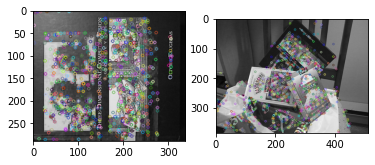

In [ ]:
# plot the keypoints
key1_plot = cv2.drawKeypoints(img1, key1, img1)
key2_plot = cv2.drawKeypoints(img2, key2, img2)

# show the plotting
ig, axs = plt.subplots(1,2)
axs[0].imshow(key1_plot)
axs[1].imshow(key2_plot)
plt.show()

In [ ]:
# match the first ,second best-matched keypoints in train to query

def match_descriptors(dcp1, dcp2):
    # first_match - first match from des2 for each descriptor in des1
    # second_match - second match from des2 each descriptor in des1
    # format: list(list(index, L2distance))

    first_match = [[-1, -1] for i in range(len(dcp1))]
    second_match = [[-1, -1] for i in range(len(dcp1))]

    for i in range(0, len(dcp1)):
        for j in range(0, len(dcp2)):

            dist = cv2.norm(dcp1[i], dcp2[j], normType=cv2.NORM_L2)

            if first_match[i][0] == -1:
                first_match[i][0], first_match[i][1] = j, dist

            elif second_match[i][0] == -1:
                second_match[i][0], second_match[i][1] = j, dist

            elif dist < first_match[i][1]:
                second_match[i][0], second_match[i][1] = first_match[i][0], first_match[i][1]
                first_match[i][0], first_match[i][1] = j, dist

            elif dist < second_match[i][1]:
                second_match[i][0], second_match[i][1] = j, dist


    return first_match, second_match

In [ ]:
first, second = match_descriptors(dcp1, dcp2)

# to use the function cv2.drawMatchesKnn, we need to transform first from list to matcher object
for i in range(len(first)):
    first[i] = cv2.DMatch(i, first[i][0], first[i][1])

# Apply ratio test, threshold = 0.9
good = []
for m,n in zip(first, second):
    if m.distance < 0.9 * n[1]:
        good.append([m])

In [ ]:
img3 = cv2.drawMatchesKnn(img1,key1,img2,key2,good,None)

# print (len(good))
cv2.imshow('image',img3)

# Run the following line, the outcome will pop the image on the screen. 
# I screenshot the image and stored it as "alignment.png" in the folder of this notebook.

# cv2.waitKey(0)

In [ ]:
# 
src_pts = np.float32([ key1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ key2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

In [ ]:
print('a')